In [1]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn import metrics

%matplotlib inline
import seaborn

# Load libraries

from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Python: 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:28:17) 
[GCC 7.2.0]
scipy: 1.1.0
numpy: 1.14.3
matplotlib: 2.2.2
pandas: 0.23.0
sklearn: 0.19.1


In [8]:
# read CSV of analytics staff data

data = pd.read_csv('nba analytics staff data take two.csv', header=0)
data = data.dropna()
data.head

<bound method NDFrame.head of              Team          Season                  TeamSeason  Staff  Wins  \
0           Hawks       tenSeason              HawkstenSeason      0    53   
1         Celtics       tenSeason            CelticstenSeason      2    50   
2            Nets       tenSeason               NetstenSeason      0    12   
3         Bobcats       tenSeason            BobcatstenSeason      0    44   
4           Bulls       tenSeason              BullstenSeason      0    41   
5       Cavaliers       tenSeason          CavalierstenSeason      2    61   
6       Mavericks       tenSeason          MaverickstenSeason      2    55   
7         Nuggets       tenSeason            NuggetstenSeason      1    53   
8         Pistons       tenSeason            PistonstenSeason      0    27   
9        Warriors       tenSeason           WarriorstenSeason      0    26   
10        Rockets       tenSeason            RocketstenSeason      4    42   
11         Pacers       tenSeason 

In [13]:
# Look at the variable names 

variablenames = data.keys()
print (variablenames)

Index(['Team', 'Season', 'TeamSeason', 'Staff', 'Wins', 'PS/G', 'PA/G', 'SRS',
       'Championship', 'ThreePointers', 'ThreePointersAttempted',
       'ThreePointPercentage'],
      dtype='object')


In [6]:
# check correlations

data.corr()

,Staff,Wins,PS/G,PA/G,SRS,Championship,ThreePointers,ThreePointersAttempted,ThreePointPercentage
Staff,1.000000,0.121539,0.295929,0.205394,0.107609,-0.003598,0.398367,0.429436,0.025126
Wins,0.121539,1.000000,0.510230,-0.347061,0.942937,0.284315,0.332576,0.239064,0.557331
PS/G,0.295929,0.510230,1.000000,0.588234,0.481251,0.171551,0.712026,0.668522,0.476758
PA/G,0.205394,-0.347061,0.588234,1.000000,-0.423309,-0.084881,0.450125,0.492493,-0.023029
SRS,0.107609,0.942937,0.481251,-0.423309,1.000000,0.281738,0.298699,0.204513,0.552395
Championship,-0.003598,0.284315,0.171551,-0.084881,0.281738,1.000000,0.116012,0.076022,0.198700
ThreePointers,0.398367,0.332576,0.712026,0.450125,0.298699,0.116012,1.000000,0.982008,0.480096
ThreePointersAttempted,0.429436,0.239064,0.668522,0.492493,0.204513,0.076022,0.982008,1.000000,0.312879
ThreePointPercentage,0.025126,0.557331,0.476758,-0.023029,0.552395,0.198700,0.480096,0.312879,1.000000


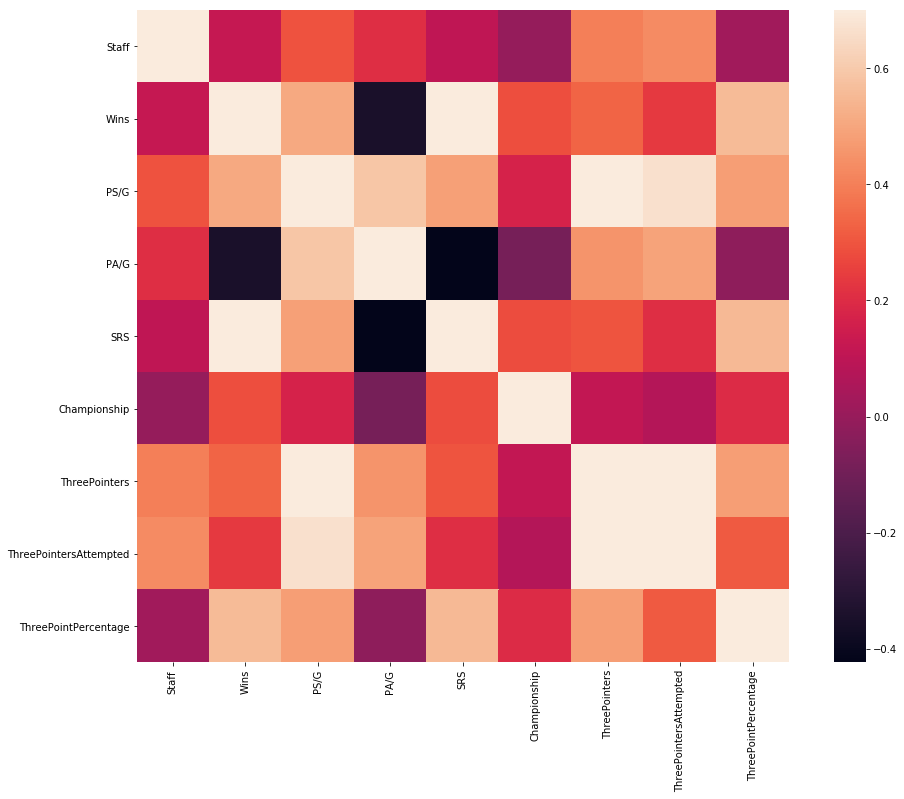

In [7]:
# Build the correlation matrix

matrix = data.corr()
f, ax = plt.subplots(figsize=(16, 12))
seaborn.heatmap(matrix, vmax=0.7, square=True)

In [24]:
# Regular regression to predict championships based on size of analytics staff

model = smf.ols("Championship ~ Staff", data= data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Championship   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.003081
Date:                Fri, 28 Sep 2018   Prob (F-statistic):              0.956
Time:                        00:11:46   Log-Likelihood:                 71.668
No. Observations:                 240   AIC:                            -139.3
Df Residuals:                     238   BIC:                            -132.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0340      0.017      1.982      0.049       0.000       0.068
Staff         -0.0005      0.009     -0.056      0.956      -0.018       0.017
==============================================================================
Omnibus:                      277.736   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7348.237
Skew:                           5.199   Prob(JB):                         0.00
Kurtosis:                      28.034   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Regular regression to predict regular season wins based on size of analytics staff

model = smf.ols("Wins ~ Staff", data= data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wins   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.568
Date:                Fri, 28 Sep 2018   Prob (F-statistic):             0.0601
Time:                        00:22:57   Log-Likelihood:                -947.93
No. Observations:                 240   AIC:                             1900.
Df Residuals:                     238   BIC:                             1907.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.3268      1.202     31.896      0.000      35.960      40.694
Staff          1.1922      0.631      1.889      0.060      -0.051       2.435
==============================================================================
Omnibus:                        5.679   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                3.427
Skew:                          -0.074   Prob(JB):                        0.180
Kurtosis:                       2.433   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
# Regular regression to predict SRS based on size of analytics staff

model = smf.ols("SRS ~ Staff", data= data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SRS   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.788
Date:                Fri, 28 Sep 2018   Prob (F-statistic):             0.0963
Time:                        00:28:24   Log-Likelihood:                -699.80
No. Observations:                 240   AIC:                             1404.
Df Residuals:                     238   BIC:                             1411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5253      0.427     -1.229      0.220      -1.367       0.317
Staff          0.3748      0.224      1.670      0.096      -0.067       0.817
==============================================================================
Omnibus:                        1.455   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.483   Jarque-Bera (JB):                1.510
Skew:                          -0.137   Prob(JB):                        0.470
Kurtosis:                       2.725   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Regular regression to predict 3PA based on size of analytics staff

model = smf.ols("ThreePointersAttempted ~ Staff", data= data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     ThreePointersAttempted   R-squared:                       0.184
Model:                                OLS   Adj. R-squared:                  0.181
Method:                     Least Squares   F-statistic:                     53.82
Date:                    Fri, 28 Sep 2018   Prob (F-statistic):           3.45e-12
Time:                            00:30:37   Log-Likelihood:                -725.14
No. Observations:                     240   AIC:                             1454.
Df Residuals:                         238   BIC:                             1461.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.5625      0.475     41.193      0.000      18.627      20.498
Staff          1.8298      0.249      7.336      0.000       1.338       2.321
==============================================================================
Omnibus:                        5.415   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                3.930
Skew:                           0.179   Prob(JB):                        0.140
Kurtosis:                       2.485   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Regular regression to predict 3P% based on size of analytics staff

model = smf.ols("ThreePointPercentage ~ Staff", data= data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     ThreePointPercentage   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.004
Method:                   Least Squares   F-statistic:                    0.1503
Date:                  Fri, 28 Sep 2018   Prob (F-statistic):              0.699
Time:                          00:31:50   Log-Likelihood:                 614.06
No. Observations:                   240   AIC:                            -1224.
Df Residuals:                       238   BIC:                            -1217.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3538      0.002    197.486      0.000       0.350       0.357
Staff          0.0004      0.001      0.388      0.699      -0.001       0.002
==============================================================================
Omnibus:                        3.701   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.774
Skew:                           0.161   Prob(JB):                        0.152
Kurtosis:                       3.523   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Regular regression to predict 3P% based on size of analytics staff

model = smf.ols("ThreePointers ~ Staff", data= data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ThreePointers   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     44.89
Date:                Fri, 28 Sep 2018   Prob (F-statistic):           1.49e-10
Time:                        00:37:37   Log-Likelihood:                -498.73
No. Observations:                 240   AIC:                             1001.
Df Residuals:                     238   BIC:                             1008.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9599      0.185     37.644      0.000       6.596       7.324
Staff          0.6507      0.097      6.700      0.000       0.459       0.842
==============================================================================
Omnibus:                        5.335   Durbin-Watson:                   1.468
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                4.482
Skew:                           0.245   Prob(JB):                        0.106
Kurtosis:                       2.544   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""